# Интерполирование функций.

#### Выбрать из области определения функции интервал непрерывности.

Наша функция имеет вид: $\space f(x) = 3*x - cos(x) - 1 $

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math

In [2]:
def out_graph(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.show()

In [3]:
X, Y = symbols('X Y')
f = 3*X - Y - 1

In [5]:
X, Y = symbols('X Y')
f = X**4 + 3*X**3 + X**2 + X + 1

Посмотрим, как выглядит график нашей функции на отрезке `[-2, 2]`:

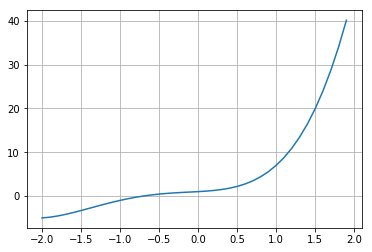

In [6]:
x = np.arange(-2, 2, 0.1); y = []
for i in range(x.shape[0]):
    y.append(f.subs({X:x[i], Y:np.cos(x[i])}))
y = np.array(y); out_graph(x, y)

Далее реализуем метод Лагранжа интерполирования функции.

In [7]:
def lagr(x, y):
    z = 0; n = len(y)
    for j in range(n):
        l1=1; l2=1
        for i in range(n):
            if i==j:
                continue
            else:
                l1 *= (X-x[i]); l2 *= (x[j]-x[i])
        z += y[j]*l1/l2
    return z    

Построим полином Лагранжа и посмотрим на его график: 

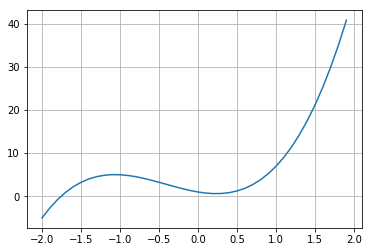

In [13]:
x = np.array([-2, 0, 1, 2]); y = []
for i in range(x.shape[0]):
    y.append(f.subs({X:x[i], Y:np.cos(x[i])}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

In [14]:
s

5*X*(X - 2)*(X - 1)/24 - 7*X*(X - 2)*(X + 2)/3 + 47*X*(X - 1)*(X + 2)/8 + (X - 2)*(X - 1)*(X + 2)/4

In [15]:
simplify(s)

4*X**3 + 5*X**2 - 3*X + 1

In [11]:
s = -5-3*(X+2)+7*(X+2)*X - 1/2*(X+2)*X*(X-1)

Выберем то же количество узлов, согласно формуле **(3.2)** из того же отрезка $(a, \space b) = (-2, \space 2)$:  
$ x_i = \frac {1}{2}[(b-a)cos\frac{(2i+1)}{2(n+1)}\pi+(b+a)],\space i=\overline{0,n} $

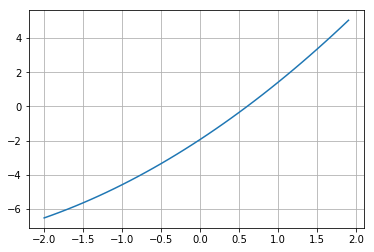

In [7]:
x = []; y = []; a = -2; b = 2; n = 3
for i in range(n):
    x.append(1/2*((b - a)*np.cos( ((2*i+1)/(2*(n+1)))*np.pi )))
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

#### Увеличим кол-во узлов.

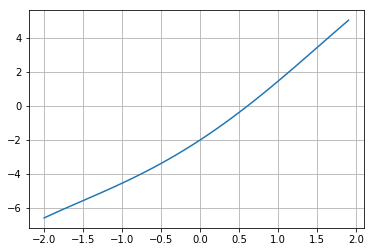

In [8]:
x = np.arange(-2, 3, 1); y = []
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

Выберем то же кол-во узлов, согласно формуле **(3.2)** из того же отрезка $(a, \space b) = (-2, \space 2)$:  
$ x_i = \frac {1}{2}[(b-a)cos\frac{(2i+1)}{2(n+1)}\pi+(b+a)],\space i=\overline{0,n} $

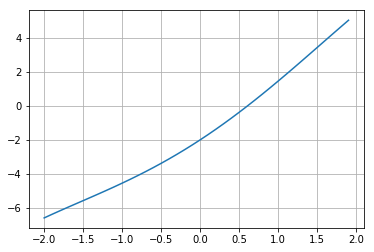

In [9]:
x = []; y = []; a = -2; b = 2; n = 5
for i in range(n):
    x.append(1/2*((b - a)*np.cos( ((2*i+1)/(2*(n+1)))*np.pi )))
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

#### Сделаем то же самое для h(x) = |x| · f(x)

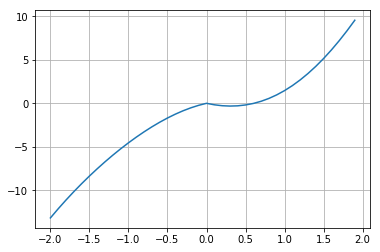

In [10]:
f = abs(X)*(3*X - Y - 1)
x = np.arange(-2, 2, 0.1); y = []
for i in range(x.shape[0]):
    y.append(f.subs({X:x[i], Y:np.cos(x[i])}))
out_graph(x, y)

Построим график полинома Лагранжа.

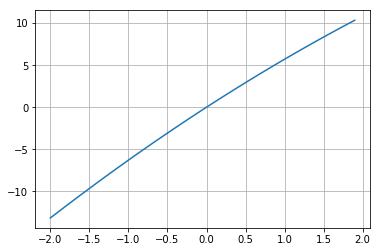

In [11]:
x = np.array([-2, 0, 2]); y = []
for i in range(x.shape[0]):
    y.append(f.subs({X:x[i], Y:np.cos(x[i])}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

Выберем то же количество узлов, согласно формуле **(3.2)** из того же отрезка $(a, \space b) = (-2, \space 2)$:  
$ x_i = \frac {1}{2}[(b-a)cos\frac{(2i+1)}{2(n+1)}\pi+(b+a)],\space i=\overline{0,n} $

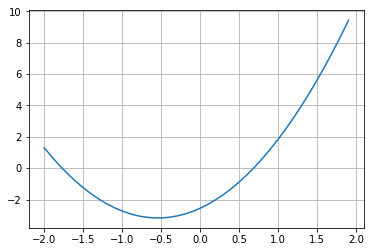

In [12]:
x = []; y = []; a = -2; b = 2; n = 3
for i in range(n):
    x.append(1/2*((b - a)*np.cos( ((2*i+1)/(2*(n+1)))*np.pi )))
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y = []
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

Увеличим число узлов:

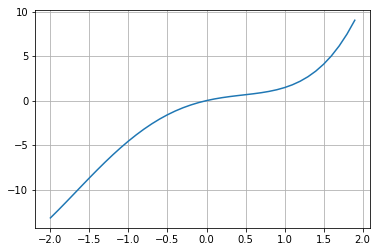

In [13]:
x = np.arange(-2, 3, 1, dtype=float); y = []
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)

Выберем то же количество узлов, согласно формуле **(3.2)** из того же отрезка $(a, \space b) = (-2, \space 2)$:  
$ x_i = \frac {1}{2}[(b-a)cos\frac{(2i+1)}{2(n+1)}\pi+(b+a)],\space i=\overline{0,n} $

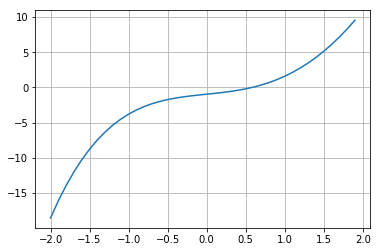

In [14]:
x = []; y = []; a = -2; b = 2; n = 5
for i in range(n):
    x.append(1/2*((b - a)*np.cos( ((2*i+1)/(2*(n+1)))*np.pi )))
for i in x:
    y.append(f.subs({X:i, Y:np.cos(i)}))
s = lagr(x, y); x = np.arange(-2, 2, 0.1); y=[]
for i in x:
    y.append(s.subs({X:i}))
out_graph(x, y)